Production Code for Bird Sounder Model
- Build the pipeline to feed in split sound files
- output a csv for model training
- write a method to run in the app that finds the peak and cuts the inputted file (possibly at a couple peaks) to a similar length clip
- use that method to test the model's accuracy against unseen recordings
- youtube videos perhaps (limit the length of the recording that can be inputted), or give a disclaimer that the first couple seconds and last couple will be but out to remoce microphone noises
- give minimum and maximum (suggested) clip lengths to the app user
- 

Additional features to try
#try cepstral coefficiesnts
#try 2nd or third peak, (how to deal with missing values?)
#band pass filter for removing low frequency noise


In [23]:
#read in the csv to pandas
import pandas as pd

#previous files 'bird_train.csv' 'bird_train_test.csv' 'brid_train (copy).csv'
filename = 'bird_train_2_6.csv'
filename = '/'.join( ('feature_tables',  filename) )
data = pd.read_csv(filename)
data.columns = [dd.strip('\n').strip() for dd in data.columns]
#create a copy to chop off the target values
data_copy = data.copy(deep=True)
data.head()

,peak_Hz,peak_Q,peak_mel,fourier_freq,ampmax_n3,ampmax_n2,ampmax_n1,ampmax_0,ampmax_p1,ampmax_p2,...,max_cont1,mean_cont1,std_cont1,min_cont0,max_cont0,mean_cont0,std_cont0,num_samples,sample_rate,species
0,3617.578125,57,2428.050319,5249,3100.781250,3682.177734,3466.845703,7149.023438,3014.648438,4608.105469,...,22.132037,7.603044,2.945717,2.329083,29.444919,10.040726,4.514036,63945,44100,American Goldfinch
1,7101.562500,70,4399.591235,10288,7148.437500,7125.000000,10617.187500,6398.437500,5882.812500,5882.812500,...,16.927893,8.348982,2.982309,4.076578,31.773405,11.307198,4.335171,69600,48000,Tufted Titmouse
2,2433.251953,50,1755.682815,3517,1162.792969,1356.591797,1916.455078,3036.181641,2131.787109,2088.720703,...,20.384882,11.648970,3.101776,0.324314,20.194610,13.090365,3.239404,63945,44100,American Robin
3,3854.443359,59,2855.377251,6283,2583.984375,3316.113281,4909.570312,3703.710938,2411.718750,4414.306641,...,20.781397,8.064193,3.233232,3.981322,28.985889,17.965203,3.431217,63945,44100,Indigo Bunting
4,4177.441406,60,2779.260104,6067,3617.578125,4177.441406,3337.646484,4198.974609,4306.640625,3897.509766,...,23.943356,11.291723,3.805716,3.505910,29.571598,12.086025,3.992493,63945,44100,American Goldfinch


In [24]:
import seaborn as sns
data.columns

Index(['peak_Hz', 'peak_Q', 'peak_mel', 'fourier_freq', 'ampmax_n3',
       'ampmax_n2', 'ampmax_n1', 'ampmax_0', 'ampmax_p1', 'ampmax_p2',
       'rms_min', 'rms_max', 'rms_mean', 'rms_std', 'flat_min', 'flat_max',
       'flat_mean', 'flat_std', 'rolloff_min', 'rolloff_max', 'rolloff_mean',
       'rolloff_std', 'band_cont0', 'band_cont1', 'band_cont2', 'band_cont3',
       'band_cont4', 'band_cont5', 'band_cont6', 'min_cont6', 'max_cont6',
       'mean_cont6', 'std_cont6', 'min_cont5', 'max_cont5', 'mean_cont5',
       'std_cont5', 'min_cont4', 'max_cont4', 'mean_cont4', 'std_cont4',
       'min_cont3', 'max_cont3', 'mean_cont3', 'std_cont3', 'min_cont2',
       'max_cont2', 'mean_cont2', 'std_cont2', 'min_cont1', 'max_cont1',
       'mean_cont1', 'std_cont1', 'min_cont0', 'max_cont0', 'mean_cont0',
       'std_cont0', 'num_samples', 'sample_rate', 'species'],
      dtype='object')

In [ ]:

#sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [22]:
df = data.drop(columns=['num_samples', 'sample_rate', 'species'])#, inplace=True )

In [ ]:
data.columns

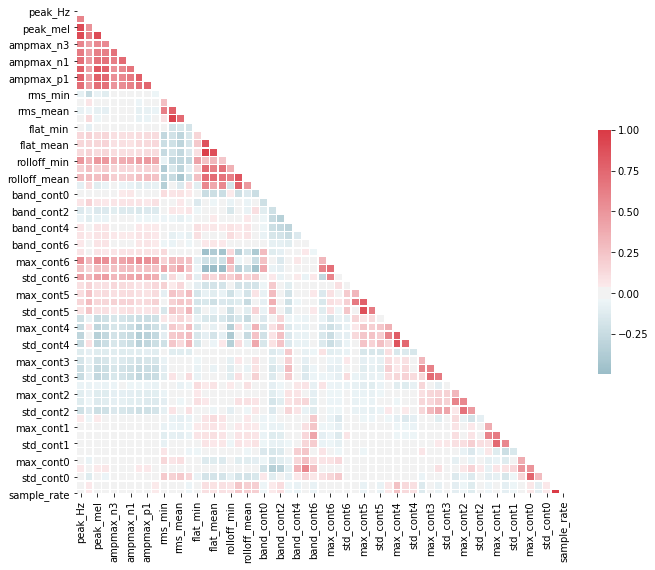

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix

corr = data.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#g = sns.pairplot(data, hue="species")
#sns.__version__


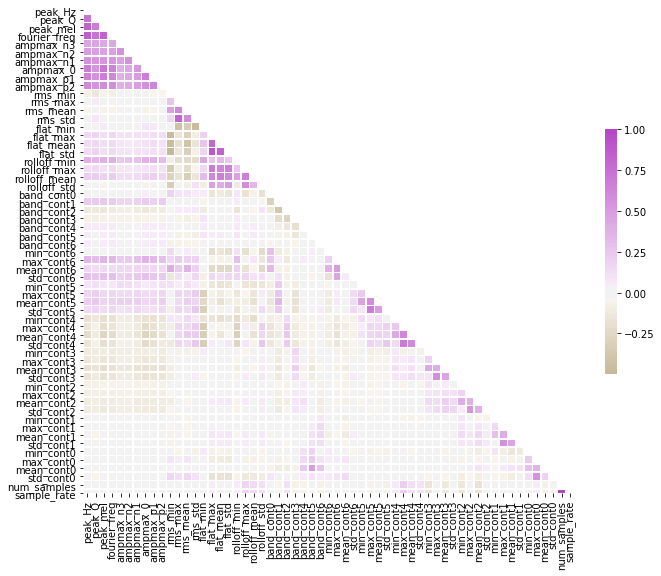

In [75]:
kendallcorr = data.corr('kendall')

mask = np.triu(np.ones_like(corr, dtype=np.bool))

#rcParams['figure.figsize'] = 14.7,8.27
cmap = sns.diverging_palette(60, 300, as_cmap=True)
plt.figure( figsize=(11, 9) )

sns.heatmap(kendallcorr, mask=mask, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap=cmap, center=0,#"YlGnBu",
           square=True, linewidths=.5, cbar_kws={"shrink": .5},
          annot=False)

In [101]:
xs = np.linspace(-1, 1, 1000)

plt.cm.Greens
'''
for i in range(359):
    cmap = sns.diverging_palette(0, i, as_cmap=True)
    plt.figure(figsize=(4,0.5))
    plt.imshow([[0, 1], [0, 1]], 
      cmap = cmap, aspect='auto',
      interpolation = 'bicubic',
    )
    plt.ylabel(i)
    plt.show()'''

"\nfor i in range(359):\n    cmap = sns.diverging_palette(0, i, as_cmap=True)\n    plt.figure(figsize=(4,0.5))\n    plt.imshow([[0, 1], [0, 1]], \n      cmap = cmap, aspect='auto',\n      interpolation = 'bicubic',\n    )\n    plt.ylabel(i)\n    plt.show()"

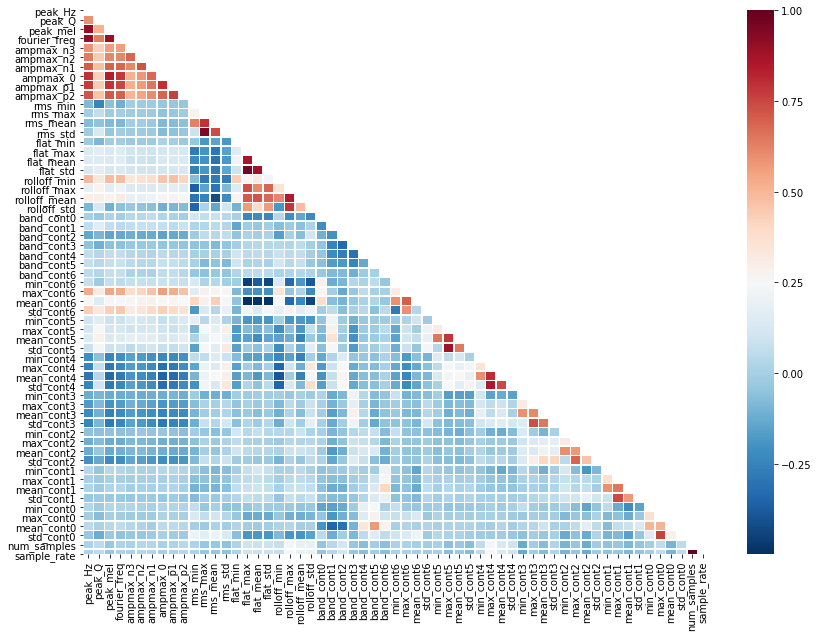

In [16]:
pearsoncorr = data.corr()

plt.figure(figsize=(14,10))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(pearsoncorr, mask=mask,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

plt.show()

In [26]:
#rempove certain species from the dataframe
df = data.copy()
data = df.drop(df[df['species'] == 'Bald Eagle'].sample(frac=1.0).index)
#data = df.drop(df[df['species'] == 'Mallard'].sample(frac=1.0).index)
data.species.value_counts().sum()

7012

Text(0.5, 1.0, 'Clip Counts per Species')

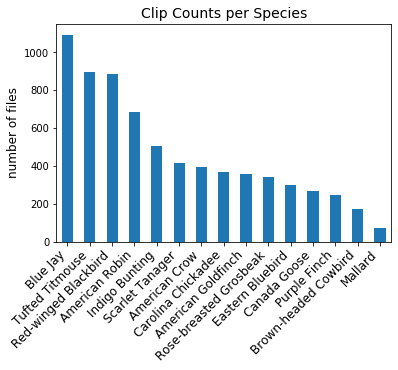

In [28]:
#data.species.plot.hist()
ax = data.species.value_counts().plot(kind='bar')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12 )
ax.set_ylabel('number of files', fontsize=12)
ax.set_title('Clip Counts per Species', fontsize=14)

In [ ]:
#check the peak frequency distribution
data.peak_Hz.hist(bins=500)
data[ data.peak_Hz < 1420 ].species.value_counts()

In [ ]:
#check the constant Q frequency distribution
data.peak_Q.hist(bins=500)
data[ data.peak_Q < 10 ].species.value_counts()

In [ ]:
#check the mel frequency distribution
data.peak_mel.hist(bins=500)

data[ data.peak_mel < 1000 ].species.value_counts()

In [29]:
#use OneHot encoding to transform categorical data into something useful
from sklearn.preprocessing import OneHotEncoder
#simple imputer will handle missing values
from sklearn.impute import SimpleImputer
#chain together multiple transformations in one custom filter
from sklearn.pipeline import Pipeline
#select (by column header/key) which columns get which kind of transformation
from sklearn.compose import ColumnTransformer

In [30]:
#choose which columns get transformed
cat_cols = ['species']
#create the pipeline
cat_si_step = ('si', SimpleImputer(strategy='constant',
                   fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))

#combine the two transformations into a single Pipeline
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)

cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

target_fit_transformed = ct.fit_transform(data)
target_transformed = ct.transform(data) #fit shouldnt matter for one-hot encoding

pd.DataFrame( target_fit_transformed ).tail(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
7006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7010,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#remove the species column from the test dataframe
species_col = data.pop('species')

In [32]:
#get the feature names from the transformation
all_steps = ct.named_transformers_['cat']
ohe = all_steps.named_steps['ohe']
cat_feature_names = ohe.get_feature_names()
#clean up the feature names to make more readable
ohe_column_names = [cfn.strip('x0_').strip() for cfn in cat_feature_names]
cat_feature_names, ohe_column_names 

(array(['x0_American Crow', 'x0_American Goldfinch', 'x0_American Robin',
        'x0_Blue Jay', 'x0_Brown-headed Cowbird', 'x0_Canada Goose',
        'x0_Carolina Chickadee', 'x0_Eastern Bluebird',
        'x0_Indigo Bunting', 'x0_Mallard', 'x0_Purple Finch',
        'x0_Red-winged Blackbird', 'x0_Rose-breasted Grosbeak',
        'x0_Scarlet Tanager', 'x0_Tufted Titmouse'], dtype=object),
 ['American Crow',
  'American Goldfinch',
  'American Robin',
  'Blue Jay',
  'Brown-headed Cowbird',
  'Canada Goose',
  'Carolina Chickadee',
  'Eastern Bluebird',
  'Indigo Bunting',
  'Mallard',
  'Purple Finch',
  'Red-winged Blackbird',
  'Rose-breasted Grosbeak',
  'Scarlet Tanager',
  'Tufted Titmouse'])

Use stratified random sample for the test/train split
this will preserve species ratios of the data in train/test split

In [ ]:
#initialize a random forest regressor model
from sklearn.ensemble import RandomForestRegressor


max_depth = 30

regr_rf = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, 
                                random_state=12)#



In [ ]:
#from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
from sklearn.metrics import r2_score

from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.7, random_state=42)

#one hot encoding target
X,y = np.array(data), np.array(target_transformed)
#string target
#X,y = np.array(data), np.array(species_col)




In [ ]:
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #fit the model with the new vaues
    regr_rf.fit(X_train, y_train)
    #evaluate the fit accuracy
    #print(regr_rf.score(X_test, y_test))
    y_pred = regr_rf.predict(X_test)#, y_test)#, multioutput='uniform_average')
    print( r2_score(y_test, y_pred) )

In [ ]:
for feat,imp in zip(data.columns, regr_rf.feature_importances_):
    print(feat.strip(), imp)

In [ ]:

regr_rf.fit(X_train, y_train)
#evaluate the fit accuracy
regr_rf.score(X_test, y_test)
#y_pred = regr_rf.predict(X_test)#, y_test)#, multioutput='uniform_average')

#r2_score(y_test, y_pred) #...          multioutput='variance_weighted')
#y_pred, y_pred.shape, y_test.shape

In [33]:
from sklearn.metrics import f1_score

def GetF1Scores( y_test, y_pred ):
    f1macro = f1_score(y_test, y_pred, average='macro')
    f1micro = f1_score(y_test, y_pred, average='micro')
    f1weighted = f1_score(y_test, y_pred, average='weighted')
    f1none = f1_score(y_test, y_pred, average=None)

    return f1macro, f1micro, f1weighted#, f1none

In [102]:
#string target
import numpy as np

X,y = np.array(data), np.array(species_col)

from sklearn.ensemble import GradientBoostingClassifier
#recalls
params_recall_2_6 = {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 150}
params_prec = {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 200} #prec hyper-tuned for v2 9_species
params = {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 6, 'n_estimators': 150} #params hyper-tuned for v2 (9 birds 14 features)
cbg = GradientBoostingClassifier( **params_recall_2_6 )

In [103]:
#loop through a series of splits to score the model and check the consistency across splits
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.7, random_state=146)
from sklearn.metrics import classification_report

ds = []
outdict = True

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    cbg.fit(X_train, y_train)
    y_pred = cbg.predict( X_test )
    #confusion_matrix = MakeConfusionMatrix( y_test, y_pred )
    #PrintConfusionMatrix(confusion_matrix.values, confusion_matrix.columns, normalize=True);
    print(GetF1Scores( y_test, y_pred ) )
    CR = classification_report(y_test, y_pred, output_dict=outdict )
    if not outdict:
        print( CR )
    ds.append( CR )#classification_report(y_test, y_pred))#, output_dict=True ) )

(0.606864704515736, 0.6624567121613363, 0.6562897574014711)
(0.6049494484470698, 0.6657160317783662, 0.65725235624418)
(0.6023705666477014, 0.6642900794459157, 0.657258579056795)
(0.6254246410390631, 0.674882868201263, 0.668858359020762)
(0.5981688593359676, 0.6622530046852719, 0.6530650638266134)


In [ ]:
#how the model works...be able to explain
#grid based hyper parameter searach
#sklearn paramater search...
#"I did the parameter tuning"

cbg.fit(X_train, y_train)

y_pred = cbg.predict(X_test)
cbg.score(X_test, y_test)
#print( r2_score(y_test, y_pred) )

In [ ]:
from sklearn.metrics import r2_score
print( r2_score(y_test, y_pred) )

In [ ]:
d = classification_report(y_test, y_pred, output_dict=True )
#d
#print(d)
#d['accuracy'], d['macro avg'], d['weighted avg'],

In [36]:
#get the results from the loop of splits

def GetReportResults( ds ):
    accuracies = [d['accuracy'] for d in ds]
    #macro scores
    macro_pres = [d['macro avg']['precision'] for d in ds]
    macro_recall = [d['macro avg']['recall'] for d in ds]
    macro_f1 = [d['macro avg']['f1-score'] for d in ds]
    macro_support = [d['macro avg']['support'] for d in ds]
    #weighted scores
    weighted_pres = [d['weighted avg']['precision'] for d in ds]
    weighted_recall = [d['weighted avg']['recall'] for d in ds]
    weighted_f1 = [d['weighted avg']['f1-score'] for d in ds]
    weighted_support = [d['weighted avg']['support'] for d in ds]
    print('avg accuracy: {:.3f}'.format( np.average(accuracies) ) )
    print('macro')
    print(' avg_prescision avg_recall avg_macro')
    print('{:.3} {:.3} {:.3}'.format( np.average(macro_pres), np.average(macro_recall), np.average(macro_f1)))
    print('weighted')
    print( '{:.3} {:.3} {:.3}'.format( np.average(weighted_pres), np.average(weighted_recall), np.average(weighted_f1)))

GetReportResults( ds )

avg accuracy: 0.640
macro
 avg_prescision avg_recall avg_macro
0.643 0.565 0.59
weighted
0.643 0.64 0.633


In [ ]:
#f1 scores for default values
#they are actually worse...change the hyperparameter tuning properties...
GetF1Scores( y_test, y_pred )

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix

def MakeConfusionMatrix( y_test, y_pred ):
    data = {'y_Actual':   y_test,
            'y_Predicted': y_pred
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

    print( confusion_matrix.shape )
    confusion_matrix = confusion_matrix[:-1]
    print( confusion_matrix.shape )
    confusion_matrix.drop(columns=['All'], inplace=True)


    ##plt.figure(figsize=(14,10))
    ##sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    '''disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=True)'''
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    #b, t = plt.ylim() # discover the values for bottom and top
    #b += 0.5 # Add 0.5 to the bottom
    #t -= 0.5 # Subtract 0.5 from the top
    ##plt.ylim(b, t) # update the ylim(bottom, top) values
    ##plt.show() # ta-da!
    return confusion_matrix

confusion_matrix = MakeConfusionMatrix( y_test, y_pred )
#confusion_matrix.values, confusion_matrix.columns

(16, 16)
(15, 16)


(16, 16)
(15, 16)
Normalized confusion matrix
Confusion matrix, without normalization


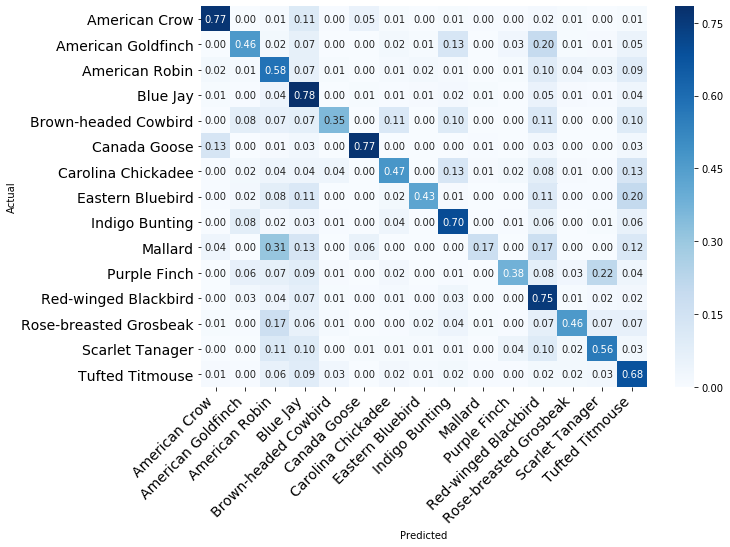

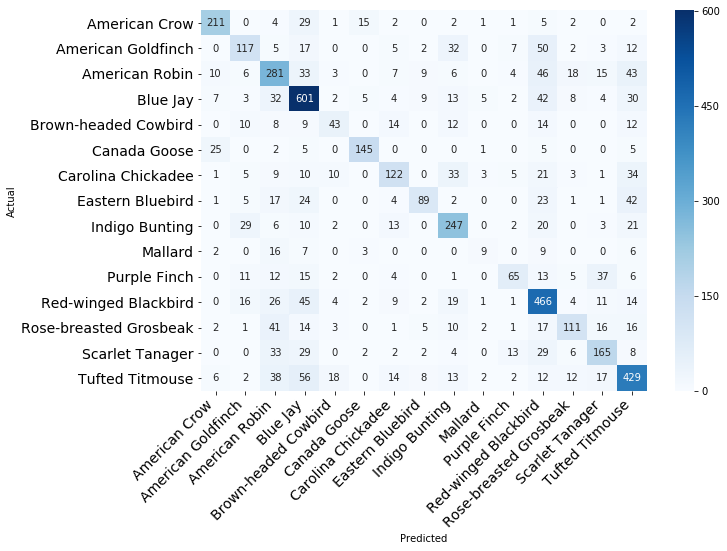

In [38]:
#modified from https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, normalize=False, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        #print(confusion_matrix)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fmt = '.2f' if normalize else 'd'
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt=fmt, cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    return fig

confusion_matrix = MakeConfusionMatrix( y_test, y_pred )
print_confusion_matrix(confusion_matrix.values, confusion_matrix.columns, normalize=True);
print_confusion_matrix(confusion_matrix.values, confusion_matrix.columns);

sample_rate 0.000
num_samples 0.001
band_cont1 0.002
band_cont3 0.002
band_cont2 0.002
band_cont5 0.002
band_cont4 0.003
band_cont0 0.003
band_cont6 0.003
std_cont1 0.004
min_cont1 0.005
max_cont1 0.005
flat_max 0.005
std_cont2 0.006
max_cont4 0.006
min_cont3 0.007
std_cont0 0.008
flat_std 0.008
max_cont3 0.008
max_cont2 0.009
min_cont5 0.009
min_cont6 0.009
ampmax_n2 0.009
rms_std 0.009
flat_mean 0.009
rolloff_mean 0.009
rolloff_max 0.010
max_cont0 0.010
min_cont4 0.010
mean_cont1 0.011
flat_min 0.011
ampmax_n3 0.011
min_cont2 0.012
mean_cont0 0.012
rms_min 0.013
min_cont0 0.013
rms_mean 0.015
mean_cont2 0.018
rms_max 0.019
peak_Q 0.022
rolloff_std 0.023
peak_mel 0.023
std_cont6 0.023
max_cont5 0.024
fourier_freq 0.024
mean_cont6 0.025
std_cont3 0.026
ampmax_p1 0.027
ampmax_p2 0.029
ampmax_n1 0.029
mean_cont4 0.031
mean_cont5 0.031
mean_cont3 0.034
peak_Hz 0.039
max_cont6 0.042
std_cont4 0.047
rolloff_min 0.049
std_cont5 0.049
ampmax_0 0.094


Text(0.5, 1.0, 'Feature Importance')

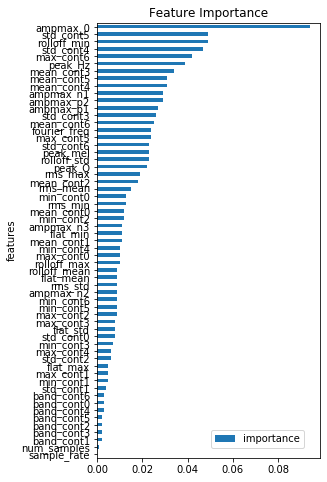

In [39]:
dfin = []
for feat,imp in sorted( zip(data.columns, cbg.feature_importances_), key=lambda l:l[1]):#, reverse=True):
    print(feat.strip(), '{:.3f}'.format(imp) )
    dfin.append( (feat.strip(), '{:.3f}'.format(imp)) )
df = pd.DataFrame(dfin)
df.columns = 'features', 'importance'
#df.set_index('features', drop=True, inplace=True)
df.importance = df.importance.astype(float)
f,ax = plt.subplots( figsize=(4,8) )
df.plot.barh(x='features', y='importance', ax=ax ).legend(bbox_to_anchor=(0.95, 0.075))
ax.set_title( 'Feature Importance' )

In [ ]:
feature_list = 'prominent frequency', 'prominent Q-power frequency', 'prominent mel-frequency'
data.columns

In [ ]:
cbg.classes_

In [40]:
#hyperparameter tuning for gradient boost classifier
#modified from  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[2,3,4,5],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[ 25, 50, 100, 150]
    }

#score on prescision and recall...
#clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

scores = ['recall']

for score in scores:
    print(f'# Tuning hyper-parameters for {score}\n')
    #using macro scoring...try weighted after? ...for micro, prescision=acuracy...for multiclass
    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters,
                       scoring=f'{score}_macro', cv=10, n_jobs=-1)
    #clf = GridSearchCV( svm.SVC(), tuned_parameters, scoring=f'{score}_macro' )
    clf.fit( X_train, y_train )
    print('best params found on development set\n')
    print( clf.best_params_ )
    print('\ngrid scores on development set:')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean,std,params in zip( means, stds, clf.cv_results_['params'] ):
        print('{:.3f} +/-{:.3f} for {}'.format( mean, 2*std, params) )
        print('classification report:\n')
        y_true, y_pred = y_test, clf.predict( X_test )
        print( classification_report(y_true, y_pred ) )

# Tuning hyper-parameters for recall



/home/chris/anaconda3/envs/testenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params found on development set

{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 150}

grid scores on development set:
0.183 +/-0.052 for {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 25}
classification report:

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finc

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

                        precision    recall  f1-score   support

         American Crow       0.82      0.82      0.82       275
    American Goldfinch       0.63      0.48      0.55       252
        American Robin       0.55      0.64      0.59       481
              Blue Jay       0.70      0.79      0.74       767
  Brown-headed Cowbird       0.43      0.30      0.36       122
          Canada Goose       0.86      0.79      0.83       188
    Carolina Chickadee       0.63      0.51      0.56       257
      Eastern Bluebird       0.69      0.46      0.56       209
        Indigo Bunting       0.69      0.74      0.72       353
               Mallard       0.39      0.17      0.24        52
          Purple Finch       0.65      0.37      0.47       171
  Red-winged Blackbird       0.66      0.79      0.72       620
Rose-breasted Grosbeak       0.66      0.52      0.58       240
       Scarlet Tanager       0.64      0.60      0.62       293
       Tufted Titmouse       0.64      

In [ ]:
#precision
{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 200}
#recall

{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 6, 'n_estimators': 150}

In [ ]:
i = 20
for i in range(20):
    single = X_test[i].reshape(1,-1) 
    single_ans = y_test[i]

    ab = cbg.predict( single )
    probas = cbg.predict_proba( single )
    #log_probas = cbg.predict_log_proba( single )

    top_results = sorted( zip( cbg.classes_, probas[0] ), key=lambda l: l[1], reverse=True )


    print( f'actual {y_test[i]}, predicted {ab}, top_proba=predicted? {ab[0]==top_results[0][0]}' )
    for res in zip(  top_results[:3]  ):
        print(res)
    print()
    

In [ ]:
#best params found on development set

best_params = {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.17272727272727273, 'n_estimators': 10, 'subsample': 0.9}

In [ ]:
#compare default with best params found from hyper paramter tuning
cbg = GradientBoostingClassifier( **best_params )
cbg.fit(X_train, y_train)

y_pred = cbg.predict(X_test)
cbg.score(X_test, y_test)

In [ ]:
#f1 scores for 'best' values
GetF1Scores( y_test, y_pred )

sensitivity and specificity, prescision recall, -> short blub about what it says __ talk about two that people ususally use...how well it can predict.  how good is it at false discovery 

roc curve, what youd like to see goes stainght up then stairght down

get rid of bottom row...

reason of why XGboost...why did i choose it

Export the model parameters to feed into the App

In [ ]:
#write the resulting model parameters with joblib
from joblib import dump, load
dump(cbg, 'cbg_model.joblib') 
#test the loading of the model to verify it's functionality
cbg_loaded = load('cbg_model.joblib') 

In [ ]:
#cbg.fit(X_train, y_train)

y_pred = cbg_loaded.predict(X_test)
cbg_loaded.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_true, y_pred ) )

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [ {'kernel': ['rbf'], 'gamma': [1e-3],# 1e-4],
                      'C': [1, 10]},#, 100, 1000]},
                     {'kernel': ['linear'], 'C': [1, 10]}]#, 100, 1000]} ]

scores = ['precision', 'recall']

for score in scores:
    print(f'# Tuning hyper-parameters for {score}\n')
    
    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring=f'{score}_macro', n_jobs=-1 )
    clf.fit( X_train, y_train )
    print('best params found on development set\n')
    print( clf.best_params_ )
    print('\ngrid scores on development set:\n')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean,std,params in zip( means, stds, clf.cv_results_['params'] ):
        print('{:.3f} +/-{:.3f} for {}'.format( mean, 2*std, params) )
        print('classification report:\n')
        y_true, y_pred = y_test, clf.predict( X_test )
        print( classification_report(y_true, y_pred ) )
    break

In [ ]:
y.shape, y

In [ ]:
#Reciever operator curve for multi class classifier
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedShuffleSplit

# Import some data to play with
##iris = datasets.load_iris()
##X = iris.data
##y = iris.target

# Binarize the output
##y = label_binarize(y, classes=[0, 1, 2])
y = label_binarize(y, classes=ohe_column_names )
n_classes = y.shape[1]

# Add noisy features to make the problem harder
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 20 * n_features)]

# shuffle and split training and test sets
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
classifier = OneVsRestClassifier(GradientBoostingClassifier( random_state=random_state),n_jobs=-1)
                                 #random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

'''
##colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                'tab:gray', 'tab:olive', 'tab:cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
'''
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right", fontsize=8)
plt.show()

In [ ]:
for mean,std,params in zip( means, stds, clf.cv_results_['params'] ):
        print('{:.3f} +/-{:.3f} for {}'.format( mean, 2*std, params) )
        print('classification report:\n')
        y_true, y_pred = y_test, clf.predict( X_test )
        print( classification_report(y_true, y_pred ) )

take the ratio for the 'all' row and column for each species, to determine the percentage of each species that was predicted corretly
- if it is over 1, then it was 'over-fitted' to that species (i.e. it predicted that species more that there actually were'
- if it is less, then (i would think) this is better since it just mis-identified things and not thought everything was just "a blue jay" because the data set was mostly bue jays

In [ ]:
#tn, tp are diagonals
#fp = top predicted true, but actually false
#fn = predicted false, but actually true
#tn,fp,fn,tp = confusion_matrix.ravel()
CM = np.array(confusion_matrix)
tnfp = CM.ravel()
tp = 0
n = 0
fp = 0
fn = 0
print(CM.shape)
for i,row in enumerate(CM):
    for j,col in enumerate(row):
        n += col
        #print(i,j, CM[i][j], col)
        if i==j:
            tp += col #CM[i][j]
        if i>j:
            fn += col
        if i<j: fp += col

            
#confusion_matrix.all
tp, n, fp, fn

In [ ]:
CM = multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
#multilabel_confusion_matrix(y_test, y_predicted)  #give error due to continous output of RF regressor
#y_pred = (y_pred > 0.5) 
CM = multilabel_confusion_matrix(y_test, y_pred)
#CM = confusion_matrix(y_test, y_pred)
#CMml, CMml.shape
plt.figure()
sns.heatmap(CM[:,:,1], annot=True)
plt.tight_layout()

plt.figure()

sns.heatmap(CM[:,:,0], annot=True)
plt.tight_layout()
CM.shape, CM[:,:,0]
#sn.heatmap(CM, annot=True)
pd.DataFrame(y_pred).head()

In [ ]:
from sklearn.multioutput import MultiOutputRegressor


regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=1000, max_depth=max_depth, random_state=12))
regr_multirf.fit(X_train, y_train)
regr_multirf.score(X_test, y_test)

In [ ]:
label_one = ('zero', 'one')
label_two = ohe_column_names
cols = pd.MultiIndex.from_product([label_one, label_two])

pd.DataFrame(CM.T.reshape(2, -1), columns=cols)

In [ ]:
import seaborn as sn
#get the prediction results
y_predicted = regr_rf.predict(X_test)
#store the actual answers and the predicted answers in a DataFrame
prediction_data = {'y_Actual':   y_test,
        'y_Predicted': y_predicted }

df = pd.DataFrame( y_predicted, y_test )
#df = pd.DataFrame(prediction_data)#, columns=['y_Actual','y_Predicted'])
#calculate the confusion matrix
##confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

#plot the heatmap using seaborn
##sn.heatmap(confusion_matrix, annot=True)
#df = pd.DataFrame(prediction_data, columns=['y_Actual','y_Predicted'])
#y_test
df

In [ ]:
#ratio of species in train vs test (ideally should be ~3 for all)
train, test = pd.DataFrame( y_train ), pd.DataFrame( y_test )
train.columns, test.columns = ['species'], ['species']
train.species.value_counts()/test.species.value_counts(), test.species.value_counts()


In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
clf.score(X_test, y_test)


In [ ]:
predicted = regr_rf.predict(X_test)
for i,prediction in enumerate(predicted):
    print(i, y_test[i] - prediction)
    #print( sum(y_test[i] - prediction))

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

a = ((-1, 1, 2, 'a'),
     (3, 4, 2, 'b'),
     (6, 7, 3, 'c'),
     (9, 10, 3, 'd'))

df = pd.DataFrame( a )
df.columns = 'first second third letters'.split()
g_works = sns.pairplot(df)
g_broken = sns.pairplot(df, hue="letters")